**DNN - Feed Forward Neural Networks (FFNN)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

data = pd.read_csv('cleaned_dataset.csv')

data.fillna(0, inplace=True)

label_encoder = LabelEncoder()
data['OP_UNIQUE_CARRIER'] = label_encoder.fit_transform(data['OP_UNIQUE_CARRIER'])
data['ORIGIN'] = label_encoder.fit_transform(data['ORIGIN'])
data['DEST'] = label_encoder.fit_transform(data['DEST'])

data['DELAYED'] = np.where(data['DEP_DELAY'] > 15, 1, 0)

data.drop(['DEP_DELAY'], axis=1, inplace=True)

X = data.drop('DELAYED', axis=1)
y = data['DELAYED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 128s 4ms/step - accuracy: 0.9683 - loss: 0.0888 - val_accuracy: 0.9858 - val_loss: 0.0327
Epoch 2/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9887 - loss: 0.0273 - val_accuracy: 0.9942 - val_loss: 0.0168
Epoch 3/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 118s 3ms/step - accuracy: 0.9902 - loss: 0.0238 - val_accuracy: 0.9901 - val_loss: 0.0239
Epoch 4/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 118s 3ms/step - accuracy: 0.9909 - loss: 0.0221 - val_accuracy: 0.9939 - val_loss: 0.0159
Epoch 5/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 137s 3ms/step - accuracy: 0.9915 - loss: 0.0207 - val_accuracy: 0.9916 - val_loss: 0.0207
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.9918 - loss: 0.0202
Test Accuracy: 0.9916
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step


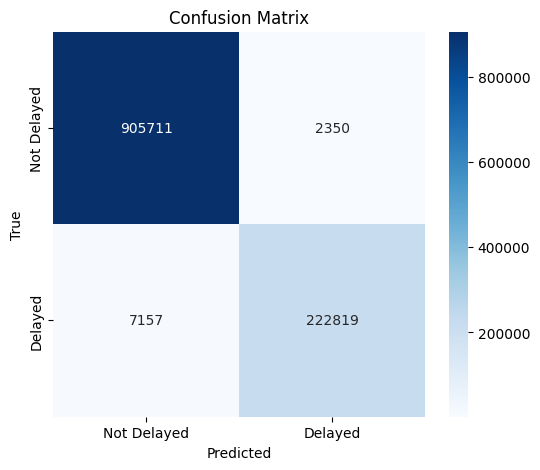

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

num_samples = 10
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

sample_data = X_test[sample_indices]
true_labels = y_test.iloc[sample_indices].values
predicted_labels = predictions[sample_indices].flatten()

sample_df = pd.DataFrame(sample_data, columns=data.drop('DELAYED', axis=1).columns)
sample_df['True Label'] = true_labels
sample_df['Predicted Label'] = predicted_labels

print("Sample Test Data with True and Predicted Labels:")
print(sample_df)


Sample Test Data with True and Predicted Labels:
   YEAR     MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER    ORIGIN  \
0   0.0 -1.051081     -0.199863     0.535986           1.318862 -1.420697   
1   0.0  1.309147     -1.570075     1.540410          -1.144675  0.709047   
2   0.0  0.719090      0.485243     1.038198           1.318862  0.936827   
3   0.0 -0.756053      1.284534     1.540410           0.423030  1.426555   
4   0.0 -0.461024      0.256875     1.540410          -0.920717  0.196542   
5   0.0 -1.346110     -0.085678     1.038198          -0.920717 -0.874025   
6   0.0 -1.051081      0.485243     0.033774           1.318862  1.631557   
7   0.0  0.424061     -1.113338    -0.468438           0.646988  0.139597   
8   0.0 -0.165996      1.512902     1.540410           0.199072  0.777381   
9   0.0 -1.051081     -0.999153     0.535986           0.199072 -0.372909   

       DEST  CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  DISTANCE  \
0 -0.530268      0.394917  0.3

**DNN - Convolutional Neural Networks (CNN)**

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, Flatten

data = pd.read_csv('cleaned_dataset.csv')

data.fillna(0, inplace=True)

label_encoder = LabelEncoder()
data['OP_UNIQUE_CARRIER'] = label_encoder.fit_transform(data['OP_UNIQUE_CARRIER'])
data['ORIGIN'] = label_encoder.fit_transform(data['ORIGIN'])
data['DEST'] = label_encoder.fit_transform(data['DEST'])

data['DELAYED'] = np.where(data['DEP_DELAY'] > 15, 1, 0)

data.drop(['DEP_DELAY'], axis=1, inplace=True)


X = data.drop('DELAYED', axis=1)
y = data['DELAYED']

X = X.values.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
for i in range(X_train.shape[2]):
    X_train[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_test[:, :, i] = scaler.transform(X_test[:, :, i])

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 410s 11ms/step - accuracy: 0.9416 - loss: 0.1487 - val_accuracy: 0.9707 - val_loss: 0.0696
Epoch 2/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 449s 12ms/step - accuracy: 0.9667 - loss: 0.0766 - val_accuracy: 0.9747 - val_loss: 0.0624
Epoch 3/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 423s 11ms/step - accuracy: 0.9754 - loss: 0.0593 - val_accuracy: 0.9736 - val_loss: 0.0582
Epoch 4/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 472s 12ms/step - accuracy: 0.9799 - loss: 0.0498 - val_accuracy: 0.9847 - val_loss: 0.0385
Epoch 5/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 413s 11ms/step - accuracy: 0.9822 - loss: 0.0443 - val_accuracy: 0.9834 - val_loss: 0.0366
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9834 - loss: 0.0363
Test Accuracy: 0.9834
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step


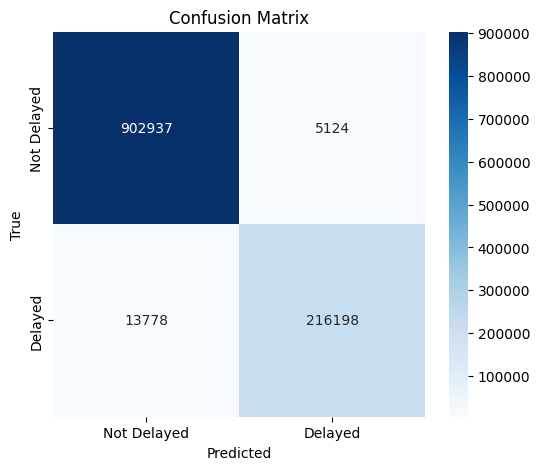

In [ ]:

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
num_samples = 10
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

sample_data = X_test[sample_indices].reshape(num_samples, -1)

true_labels = y_test[sample_indices].flatten()
predicted_labels = (model.predict(X_test[sample_indices]) > 0.5).astype(int).flatten()

sample_df = pd.DataFrame(sample_data, columns=data.drop('DELAYED', axis=1).columns)
sample_df['True Label'] = true_labels
sample_df['Predicted Label'] = predicted_labels

print("Sample Test Data with True and Predicted Labels:")
print(sample_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Sample Test Data with True and Predicted Labels:
   YEAR     MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER    ORIGIN  \
0   0.0  0.424061      1.170349    -0.970650           1.318862  0.367377   
1   0.0  0.719090      1.512902    -1.472862          -0.696759 -1.238473   
2   0.0 -1.641139     -0.770785     0.033774           0.646988  0.219320   
3   0.0  1.604176     -0.428232     0.535986          -0.696759 -0.862636   
4   0.0  0.719090     -0.656600    -0.468438           0.646988  1.335443   
5   0.0 -0.165996      0.941981    -0.970650          -0.696759 -0.851247   
6   0.0 -0.165996     -1.341706    -0.468438          -0.696759 -0.623467   
7   0.0  0.424061      0.485243    -0.468438           0.646988 -0.623467   
8   0.0  1.604176      0.371059     0.535986           0.423030  1.677113   
9   0.0  1.014119      0.256875     1.038198          -1.592591  0.481267   

       DEST  CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  DIST

**DNN - Convolutional Recurrent Neural Network (CRNN)**

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout

data = pd.read_csv('cleaned_dataset.csv')

data.fillna(0, inplace=True)

label_encoder = LabelEncoder()
data['OP_UNIQUE_CARRIER'] = label_encoder.fit_transform(data['OP_UNIQUE_CARRIER'])
data['ORIGIN'] = label_encoder.fit_transform(data['ORIGIN'])
data['DEST'] = label_encoder.fit_transform(data['DEST'])

data['DELAYED'] = np.where(data['DEP_DELAY'] > 15, 1, 0)

data.drop(['DEP_DELAY'], axis=1, inplace=True)

X = data.drop('DELAYED', axis=1)
y = data['DELAYED']

X = X.values.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
for i in range(X_train.shape[2]):
    X_train[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_test[:, :, i] = scaler.transform(X_test[:, :, i])

model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 761s 21ms/step - accuracy: 0.9412 - loss: 0.1519 - val_accuracy: 0.9719 - val_loss: 0.0640
Epoch 2/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 794s 21ms/step - accuracy: 0.9732 - loss: 0.0638 - val_accuracy: 0.9832 - val_loss: 0.0406
Epoch 3/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 834s 22ms/step - accuracy: 0.9803 - loss: 0.0479 - val_accuracy: 0.9784 - val_loss: 0.0537
Epoch 4/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 769s 21ms/step - accuracy: 0.9831 - loss: 0.0409 - val_accuracy: 0.9856 - val_loss: 0.0323
Epoch 5/5
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 754s 21ms/step - accuracy: 0.9846 - loss: 0.0372 - val_accuracy: 0.9841 - val_loss: 0.0380
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 118s 3ms/step - accuracy: 0.9841 - loss: 0.0380
Test Accuracy: 0.9841
35564/35564 ━━━━━━━━━━━━━━━━━━━━ 114s 3ms/step


In [ ]:
test_samples = X_test[:10].reshape(10, -1)
predicted_classes = predictions[:10].flatten()

test_samples_df = pd.DataFrame(test_samples, columns=data.drop('DELAYED', axis=1).columns)
print("Sample Test Data (First 10 Samples):")
print(test_samples_df)
print("\nPredictions (1 = Delayed, 0 = Not Delayed):")
print(predicted_classes)


Sample Test Data (First 10 Samples):
   YEAR     MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER    ORIGIN  \
0   0.0  0.129033     -0.428232     1.038198          -1.144675  0.219320   
1   0.0 -1.346110     -0.199863     0.535986           0.199072 -0.874025   
2   0.0  1.014119      1.398718    -0.970650           0.870946 -0.874025   
3   0.0 -1.346110     -0.999153     0.535986           0.423030  0.162375   
4   0.0 -1.641139     -0.656600     0.535986           0.870946  0.879882   
5   0.0 -1.346110     -1.227522    -0.468438           1.318862  0.390155   
6   0.0 -1.346110     -0.199863     0.535986           0.199072 -0.782913   
7   0.0 -0.165996     -1.570075    -1.472862          -0.696759 -0.110961   
8   0.0 -1.641139     -0.884969    -0.468438           0.423030  0.925438   
9   0.0 -1.346110     -0.199863     0.535986          -0.920717 -1.614311   

       DEST  CRS_DEP_TIME  DEP_TIME  CRS_ARR_TIME  ARR_TIME  DISTANCE  \
0  1.506310      0.011358 -0.009849      0

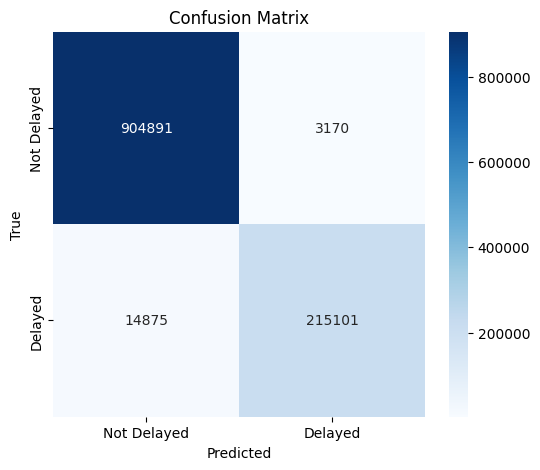

In [ ]:

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
